<a href="https://colab.research.google.com/github/sssmira/447/blob/main/447_Disney_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Introduction</h1>
<h3>Problem Description</h3>

Disney hosts some of the world’s most renowned theme parks. To maximize the magical feel of the parks, Disney builds their parks around the user experience to bring people back again and again to "feel the magic". Despite being a magical place on Earth, there are potential areas of improvement. And analyzing customer reviews identifies these areas of improvement for the theme parks.

<h3>Research Questions</h3>

* Which location has the highest average rating?
  * Why?: Informs which location is lagging behind in ratings.
* What are the top 5 countries that reviewers are located from?
  * Why?: This could inform where Disney builds there next theme park

Note: These were my original research questions:

*   What are some of the most common complaints about Disneyland?
*   Which areas could the parks improve (lines, attractions, pricing, hotels, etc) based on reviews?

But I found it hard to analyze them so I changed the questions to be a lot simpler for my skill level.

<h3>Brief Description of Data Collection</h3>

This dataset was an open source dataset posted on Kaggle by user Arush Chillar. The review data was pulled from the review website, Trip Advisor.
[Link to the original Kaggle dataset](https://www.kaggle.com/datasets/arushchillar/disneyland-reviews)

<h3>Basic Description of the Data</h3>

* Number of Samples (Rows): How many data entries are there?
42,656 rows of data are present.
* Variables (Columns) and Types: List the columns in the dataset and describe their data types (e.g., numerical, categorical, string).
* 6 columns:
Review_ID (numerical), Rating (numerical), Year_Month (string/categorical), Reviewer_Location (string/categorical), Review_Text (string), Branch (string/categorical)

<h3>Basic Statistics</h3>

Rating column statistics:
* minimum: 1
* maximum: 5
* median: 5
* mean: 4.217695049
* standard deviation: 1.063371069

Branch:
* Total for Hong Kong: 9620
* Total for Paris: 13630
* Total for California: 19406




In [ ]:
# import os package
import os

# figure out current directory
os.getcwd()

'/content'

In [ ]:
# change directory
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
import pandas as pd
data = pd.read_csv('DisneylandReviews.csv')
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


<h3>Data Cleaning and Wrangling</h3>

To clean up my data and standardize it to my liking I am going to take these steps:

*   remove entries with a value of "missing" from Year_Month
*   change Year_Month to use datetime and display as month then year
*   order the dates in chronological order
*   change branch name to just be "Hong Kong", "California", or "Paris"



In [ ]:
#remove entries with a value of "missing" from Year_Month
filtered_data = data[data['Year_Month'] != 'missing'].copy()

In [ ]:
#change Year_Month to use datetime and display as month then year
filtered_data['Year_Month'] = pd.to_datetime(filtered_data['Year_Month'], format='%Y-%m')
filtered_data['Year_Month'] = filtered_data['Year_Month'].dt.strftime('%B %Y')

In [ ]:
#order the dates in chronological order
filtered_data = filtered_data.sort_values(by='Year_Month')

In [ ]:
#change branch name to just be "Hong Kong", "California", or "Paris"
filtered_data['Branch'] = filtered_data['Branch'].replace({
    'Disneyland_HongKong': 'Hong Kong',
    'Disneyland_California': 'California',
    'Disneyland_Paris': 'Paris'
})


In [ ]:
#make new file
filtered_data.to_csv('final_data.csv', index=False)

In [ ]:
df = pd.read_csv('final_data.csv')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,97637597,5,April 2010,United States,Our last trip to Disneyland had to be a quick ...,California
1,110141311,3,April 2011,United Kingdom,Our three year old son loved Disneyland and Wa...,Paris
2,106756560,5,April 2011,United States,We visited Disneyland and California Adventure...,California
3,106896552,2,April 2011,United Kingdom,If you've never been to a Disney Park and are ...,Paris
4,105746615,2,April 2011,United Kingdom,We have been to DisneyWorld in Florida and Dis...,California


<h3>Data Analysis</h3>

Now that I have a cleaned up dataset, 'final_data.csv', I am ready to begin analyzing my data.


<h3>Research Questions</h3>

* Which location has the highest average rating?
  * Why?: Informs which location is lagging behind in ratings.
* What are the top 5 countries that reviewers are located from?
  * Why?: This could inform where Disney builds there next theme park

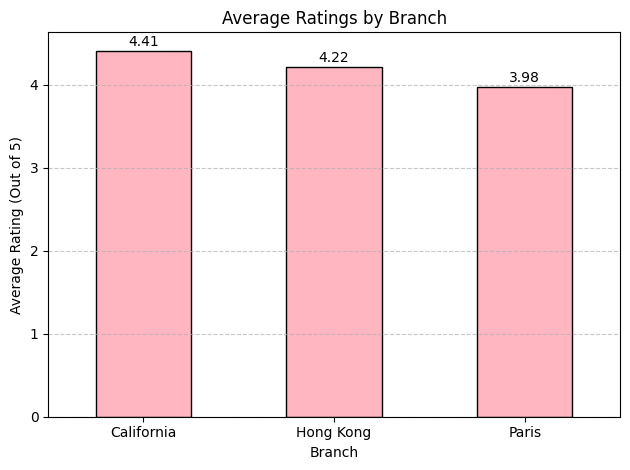

In [ ]:
import matplotlib.pyplot as plt

def ratings_bar_chart():
  avg_ratings = df.groupby('Branch')['Rating'].mean()

  plt.figure()
  bars = avg_ratings.plot(kind='bar', color='lightpink', edgecolor='black')

  for index, value in enumerate(avg_ratings):
      plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

  plt.title('Average Ratings by Branch')
  plt.xlabel('Branch')
  plt.ylabel('Average Rating (Out of 5)')
  plt.xticks(rotation=0)
  plt.yticks()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()

  plt.show()

ratings_bar_chart()

<h3>Question</h3>

* Which location has the highest average rating?
  * Why?: Informs which location is lagging behind in ratings.

<h3>What I Got From the Analysis</h3>

From the analysis I learned that Paris had the lowest average rating out of 5 points. This could mean that visitors had a less ideal experience at this location than others.

If I were to continue this project I would like the analyze some of the written reviews to figure out *why* this is. What about this location could be improved to increase its ratings?

But overall, all the locations are doing decently well if the average is hanging around a 4 at all 3 locations.

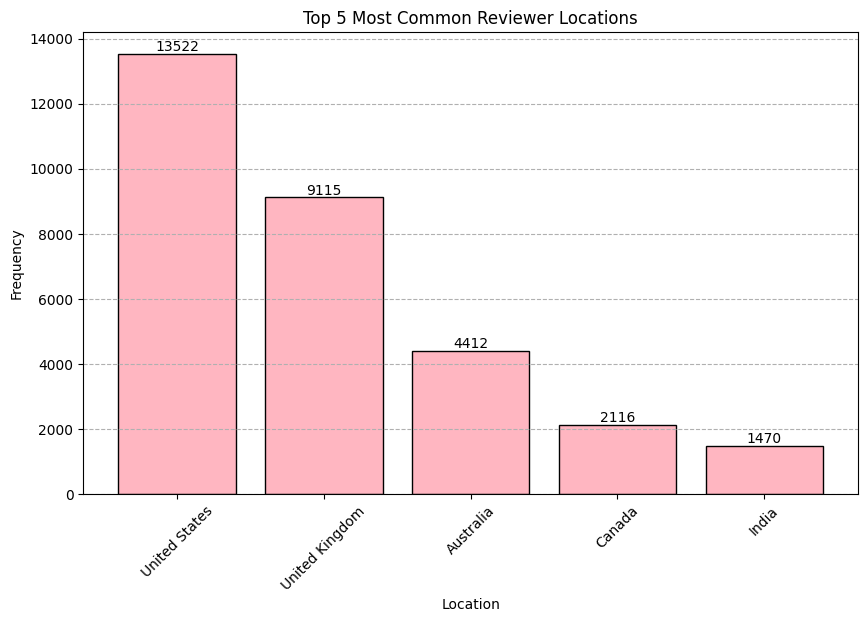

In [ ]:
def location_bar_chart():
    location_counts = df['Reviewer_Location'].value_counts()
    top_5_locations = location_counts.head(5)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_5_locations.index, top_5_locations.values, color='lightpink', edgecolor='black')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom')

    plt.title('Top 5 Most Common Reviewer Locations')
    plt.xlabel('Location')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.yticks()

    plt.show()

location_bar_chart()

<h3>Question</h3>

* What are the top 5 countries that reviewers are located from?
  * Why?: This could inform where Disney builds there next theme park

<h3>What I Got From the Analysis</h3>

Most reviewers are located from the U.S., UK, Australia, Canada, and India. So primarily English speaking countries aside from India tend to visit these 3 Disneyland locations.

This insight was pretty interesting when I started doing some research on which of these countries have a Disney themepark of any kind (World or Land). Out of the top 5, only the U.S. has any Disney themeparks open. Meaning the UK, Australia, Canada, and India do not have a Disney themepark in their country. This could be a huge opportunity on Disney's part to open up a themepark in any of these 4 countries.


SyntaxError: invalid decimal literal (ipython-input-1-3026589489.py, line 6)